In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ELM para la XOR

In [2]:
def activation(x):
    return np.log(1 + np.exp(x)) # SoftPlus
    #return np.maximum(x, 0, x) # RELU
    #return 1.0 / (1.0 - np.exp(-x)) # Sigmoid

def predict(x, W1, W2):
    x = np.matrix(x)
    return activation(x @ W1) @ W2

def train(x, y, W1):
    X = np.matrix(x)
    Y = np.matrix(y)
    H = np.matrix(activation(X @ W1))
    #U, S, Vt = np.linalg.svd(H, full_matrices = False)
    #V = np.matrix(Vt).T
    #iH = np.matrix(V) @ np.matrix(np.diag(S)).I @ np.matrix(U).T
    iH = np.linalg.pinv(H) # Moore - Penrose pseudo inverse
    W2 = iH @ Y
    return H @ W2 - Y, W2

In [3]:
data = pd.read_csv('C:/Users/Hector Garcia/Dropbox/Maestría CIC/02 - Segundo Semestre/Introducción a las redes neuronales artificiales/Tareas/05 LaTeX/code/gates.csv').values
data.view()

array([[0, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 0]], dtype=int64)

In [4]:
X_train, Y_train = data[:,:-2], data[:,-2:]
X_test, Y_test = data[:,:-2], data[:,-2:]

print(X_train.shape)

(4, 2)


In [5]:
#X_train = inputs.reshape(1,-1)
#targets = targets.reshape(1,-1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4, 2)
(4, 2)
(4, 2)
(4, 2)


In [6]:
# Input dimension
N = X_train.shape[1]
# Hidden layer dimension
M = 4
# Output dimension
O = 2
np.random.seed(10)
W1 = np.matrix(np.random.random(size = [N, M]))
W2 = np.matrix(np.random.random(size = [M, O]))

In [7]:
t0 = time.time()
H, W2 = train(X_train, Y_train, W1)
print(f'Time to train: {time.time() - t0}')

Time to train: 0.02101612091064453


In [8]:
pred = predict(X_test, W1, W2).reshape(-1, Y_test.shape[1])
pred.shape

(4, 2)

In [9]:
correct = 0
total = pred.shape[0]
for i in range(total):
  predicted = np.argmax(pred[i])
  test = np.argmax(Y_test[i])
  correct += (1 if predicted == test else 0)

print(f'Correct: {correct} out of {total} for an accuracy: {correct / total}')

Correct: 4 out of 4 for an accuracy: 1.0


# Cálculo de pseudo inversa

In [10]:
matrix = np.random.normal(size = [100, 100])
#plt.imshow(matrix, cmap = 'gray')

In [11]:
inv = np.linalg.pinv(matrix)
#plt.imshow(inv, cmap = 'gray')

In [12]:
iden = np.round(inv@matrix)
#plt.imshow(iden, cmap = 'gray')

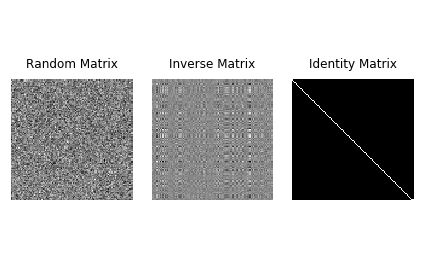

In [13]:
%matplotlib inline
fig, axs = plt.subplots(1,3)
count = 0

ax0 = axs[0]
ax0.pcolor(np.flipud(matrix), cmap = 'gray')
ax0.axis('off')
ax0.axis('equal')
ax0.set_title('Random Matrix').set_position([0.5, .75])

ax1 = axs[1]
ax1.pcolor(np.flipud(inv), cmap = 'gray')
ax1.axis('off')
ax1.axis('equal')
ax1.set_title('Inverse Matrix').set_position([0.5, .75])

ax2 = axs[2]
ax2.pcolor(np.flipud(iden), cmap = 'gray')
ax2.axis('off')
ax2.axis('equal')
ax2.set_title('Identity Matrix').set_position([0.5, .75])

        
fig.tight_layout()
plt.show()

In [14]:
# Decision boundaries
def dec_boundaries():
    # Creating mesh
    h = 0.01
    x_min, x_max = -0.2, 1.2
    y_min, y_max = -0.2, 1.2

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.c_[xx.ravel(), yy.ravel()]
    #print(Z.shape, 'd')
    out = np.zeros(np.shape(Z)[0])

    #Out model
    #for i in range(len(out)):
    #    out[i] = predict(Z[i], W1, W2)[-1]
        
    pred = predict(Z, W1, W2)#.reshape((-1,2))
    pred = np.array([np.max(e) for i, e in enumerate(pred)])
    out = np.zeros(xx.shape)
        

    out = pred.reshape(xx.shape)
    levels = np.linspace(np.min(out), np.max(out))
    plt.figure(1)
    plt.contourf(xx, yy, out, levels)
    plt.colorbar()

    # Plotting data
    lis = np.unique(Y_train)
    for i in range(len(Y_train)):
        if (np.argwhere(Y_train[i] == 1) == 0):
            #pos = np.where(Y_train == 0)[0]
            plt.plot(X_train[i][0], X_train[i][1], 'o', color = 'white', markersize = 15)
        else:
            #pos = np.where(Y_train == 1)[0]
            plt.plot(X_train[i][0], X_train[i][1], 'x', color = 'red', markersize = 15)

    plt.title('Decision boundary')
    #plt.scatter(xx.ravel()[1000:4000], yy.ravel()[1000:4000], alpha = 0.2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

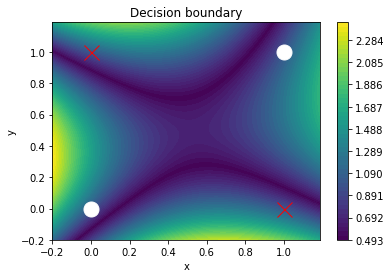

In [15]:
dec_boundaries()